In [17]:

%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as n
import os.path
import datetime

%matplotlib inline

from imp import reload
import copy
import csv

from modules import satellite, thermal, fileio, vis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
t_orbit = 92 * 60
dt = 1
path = 'C:/Users/selen/Documents/HERONSim/mission-sim/sources/heron_area.csv' #'/home/ali/UTAT/mission-sim/sources/heron_area.csv'
headers = ['plusX','plusY','negX','negY', 'plusZ', 'negZ']
panels = headers[:4]

areas = fileio.read_areas_from_file(path, dt, t_orbit)
total_areas = areas['plusX'] - areas['plusX']
panel_areas = total_areas.copy()
for h in headers:
    total_areas += areas[h]
    if h in panels: panel_areas += areas[h]
n_pts_per_orbit = len(areas)


In [19]:
# units are in seconds
timings = {
    'beacon_interval' : 60,
    'beacon_duration' :  3,
    'passover_interval' : 90*60,
    'passover_duration_exp_off' : 600,
    'passover_duration_exp_on' : 60,
    'pay_start_time' : 1  * 60 * 60, # 1 hour after launch (haven't changed from HERON)
    'pay_interval': 24 * 60 * 60,   # 24 hours between each imaging pass
    'pay_duration' : 20,    # 20 seconds of payload use
    'pay_cooling_duration' : 60 * 60,  # cooling for one hour (still undetermined because unsure about thermal activity in rest of satellite)
    'pay_cooling_start_time' : 2 * 60 * 60, # cooling starts one hour after imaging starts
    'pay_cooling_interval' : 24 * 60 * 60, # same interval as imager 
    'rf_start_time' : 0, 
    'rf_interval': 95 * 60,   # 95 minutes between each GS pass
    'rf_duration' : 360,    # 360 seconds of rf use
    'ADCS_duration' : 360
}

temperatures = {'battery': 300,
                'structure': 300,
                'payload':  300}

eps = {'battery_capacity_mAh' : 19600.0,
       'converter_efficiency' : 0.8,
       'starting_charge_frac' : 1.0}

setpoints = {'payload_stasis': 273.15 + 30.0, 'payload_exp': 273.15 + 38.0,'battery': 273.15 + 30.0}

structure_constants = {
    'area_t': 0.0013,  # total surface area of sat
    'r_batt': 130 * 10**-3,  # ohm,s #for self heating
    'R_str_pay': 16.67,  # K/W
    'R_str_batt': 14,  # fake
    'c_str': 900,  # estimate (J/K)
    'c_batt': 850,  # estimate (J/K)
    'c_pay': 800,  # guess (J/K)
    'e': 0.58,  # sat emissivity
    'a': 0.72,  # sat absorbtivity
}

In [20]:
heron = satellite.Satellite(timings,eps, temperatures, setpoints, structure_constants)

heron.get_battery_voltage()

n_orbits = 5
n_points = n_orbits * n_pts_per_orbit
t_sim = n_points * dt

for i in range(n_points):
    heron.set_state(i)
    heron.draw_powers()
    heron.update_thermal(total_areas[i % len(areas)], areas['negZ'][i%len(areas)], heron.batt_current_net)
    heron.charge_from_solar_panel(panel_areas[i % len(areas)] / (0.03 * 0.01), dt)
    heron.update_state_tracker(i*dt)

Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died

Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died

Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died

Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died

Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died

Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died

Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died

Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died

Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died
Battery Died

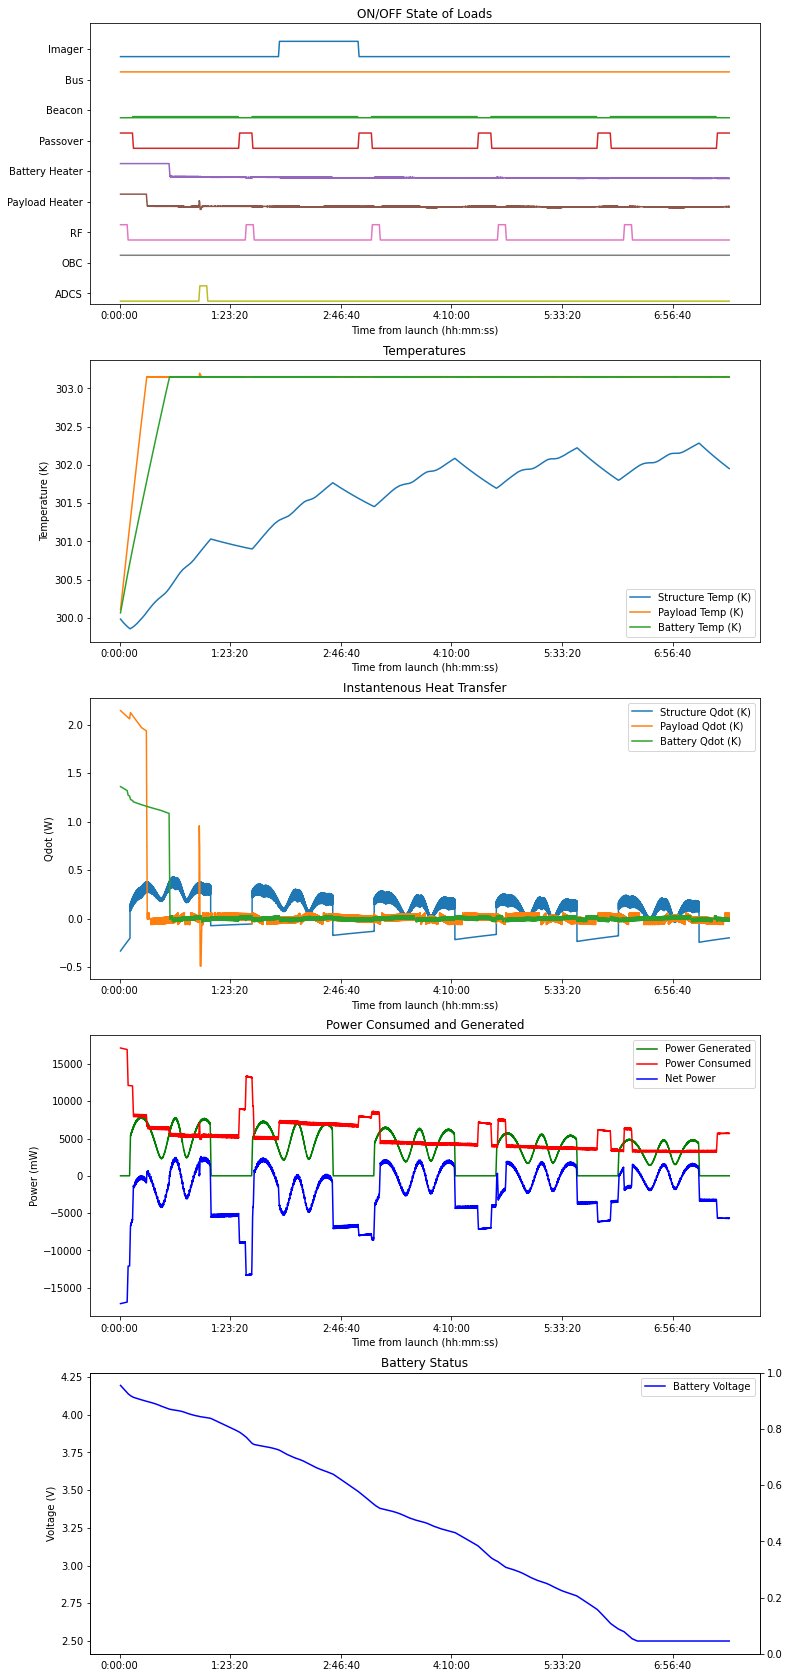

In [21]:
# second parameter is smoothing_window
vis.plot_trackers(heron, 40.0);

In [22]:
with open('simulation_currents.csv','w') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerow(['solar_curr_mA', 'load_power_mW'])
    for i in range(len(heron.trackers['batt_current_in'])):
        csvwriter.writerow([heron.trackers['max_solar_current_in_mA'][i], heron.trackers['power_out'][i]])